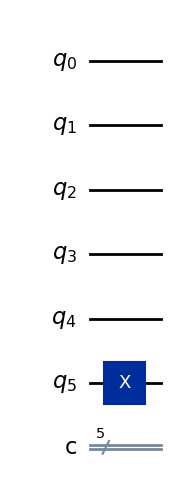

In [22]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeQasmBackend
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

qbitnum = 5+1
qpe = QuantumCircuit(qbitnum, qbitnum-1)
qpe.x(qbitnum-1)
qpe.draw('mpl')

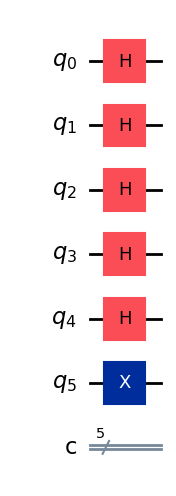

In [23]:
for qubit in range(qbitnum-1):
    qpe.h(qubit)
qpe.draw('mpl')

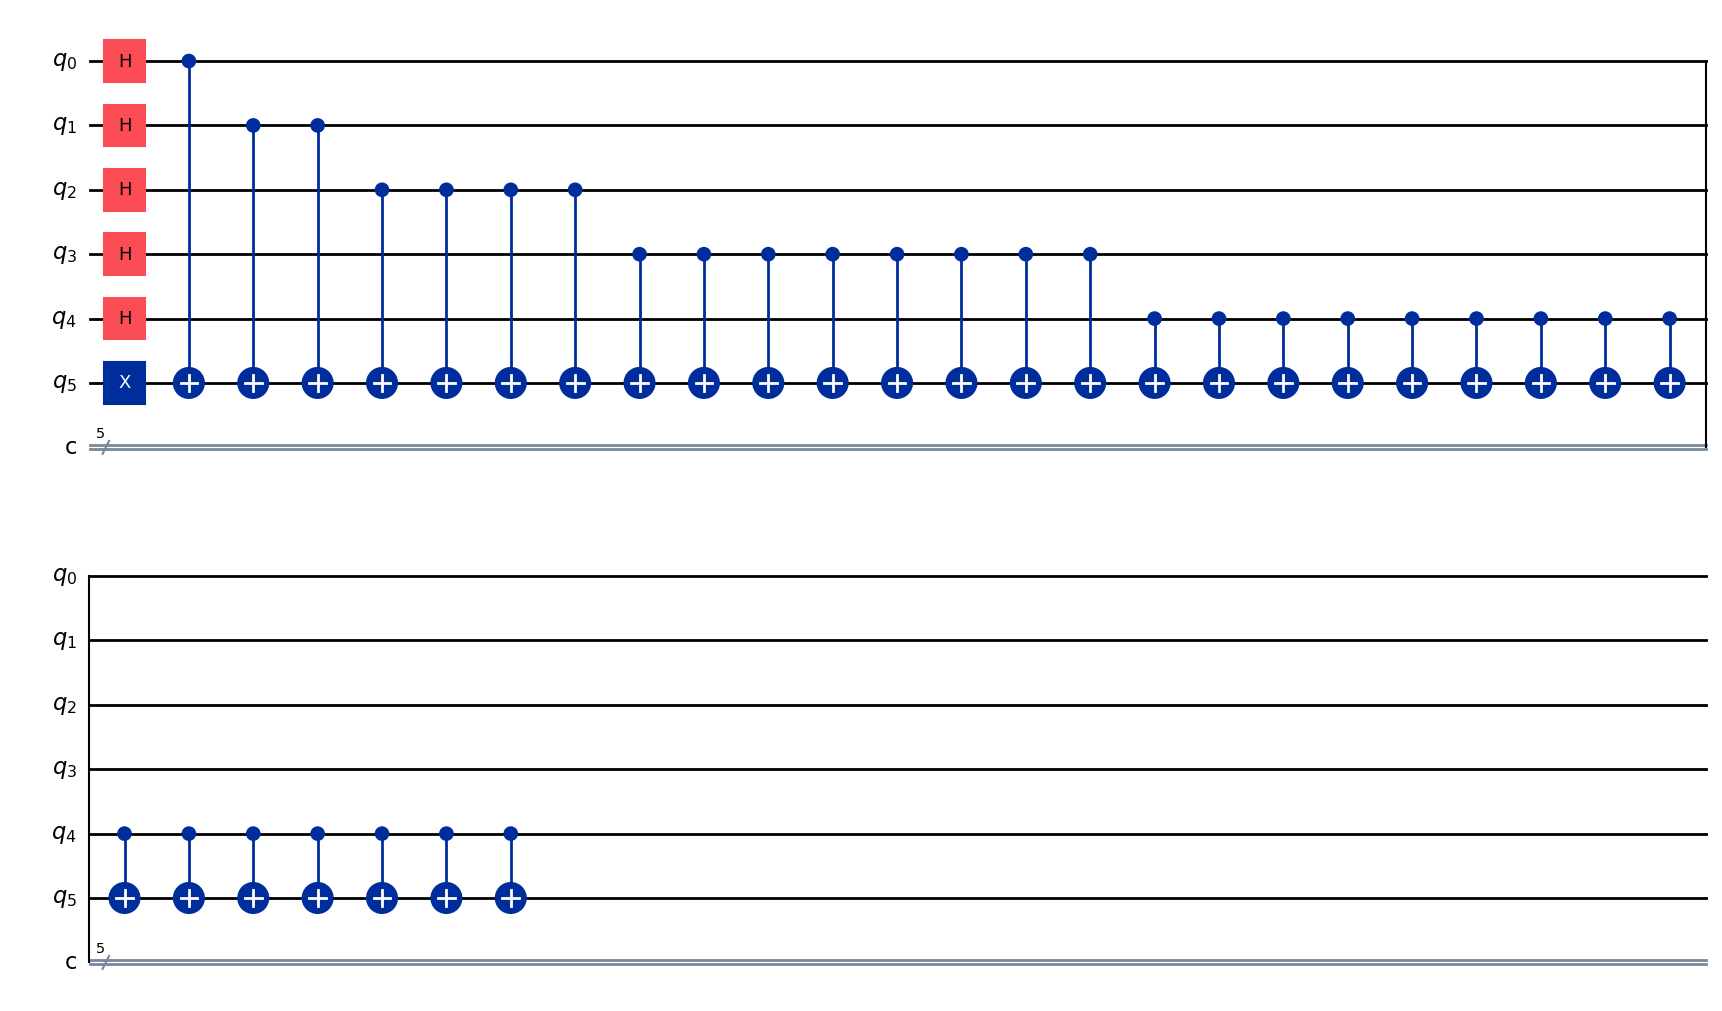

In [24]:
repetitions = 1
for counting_qubit in range(qbitnum-1):
    for i in range(repetitions):
        qpe.cx(counting_qubit, qbitnum-1); # This is CU
    repetitions *= 2
qpe.draw('mpl')

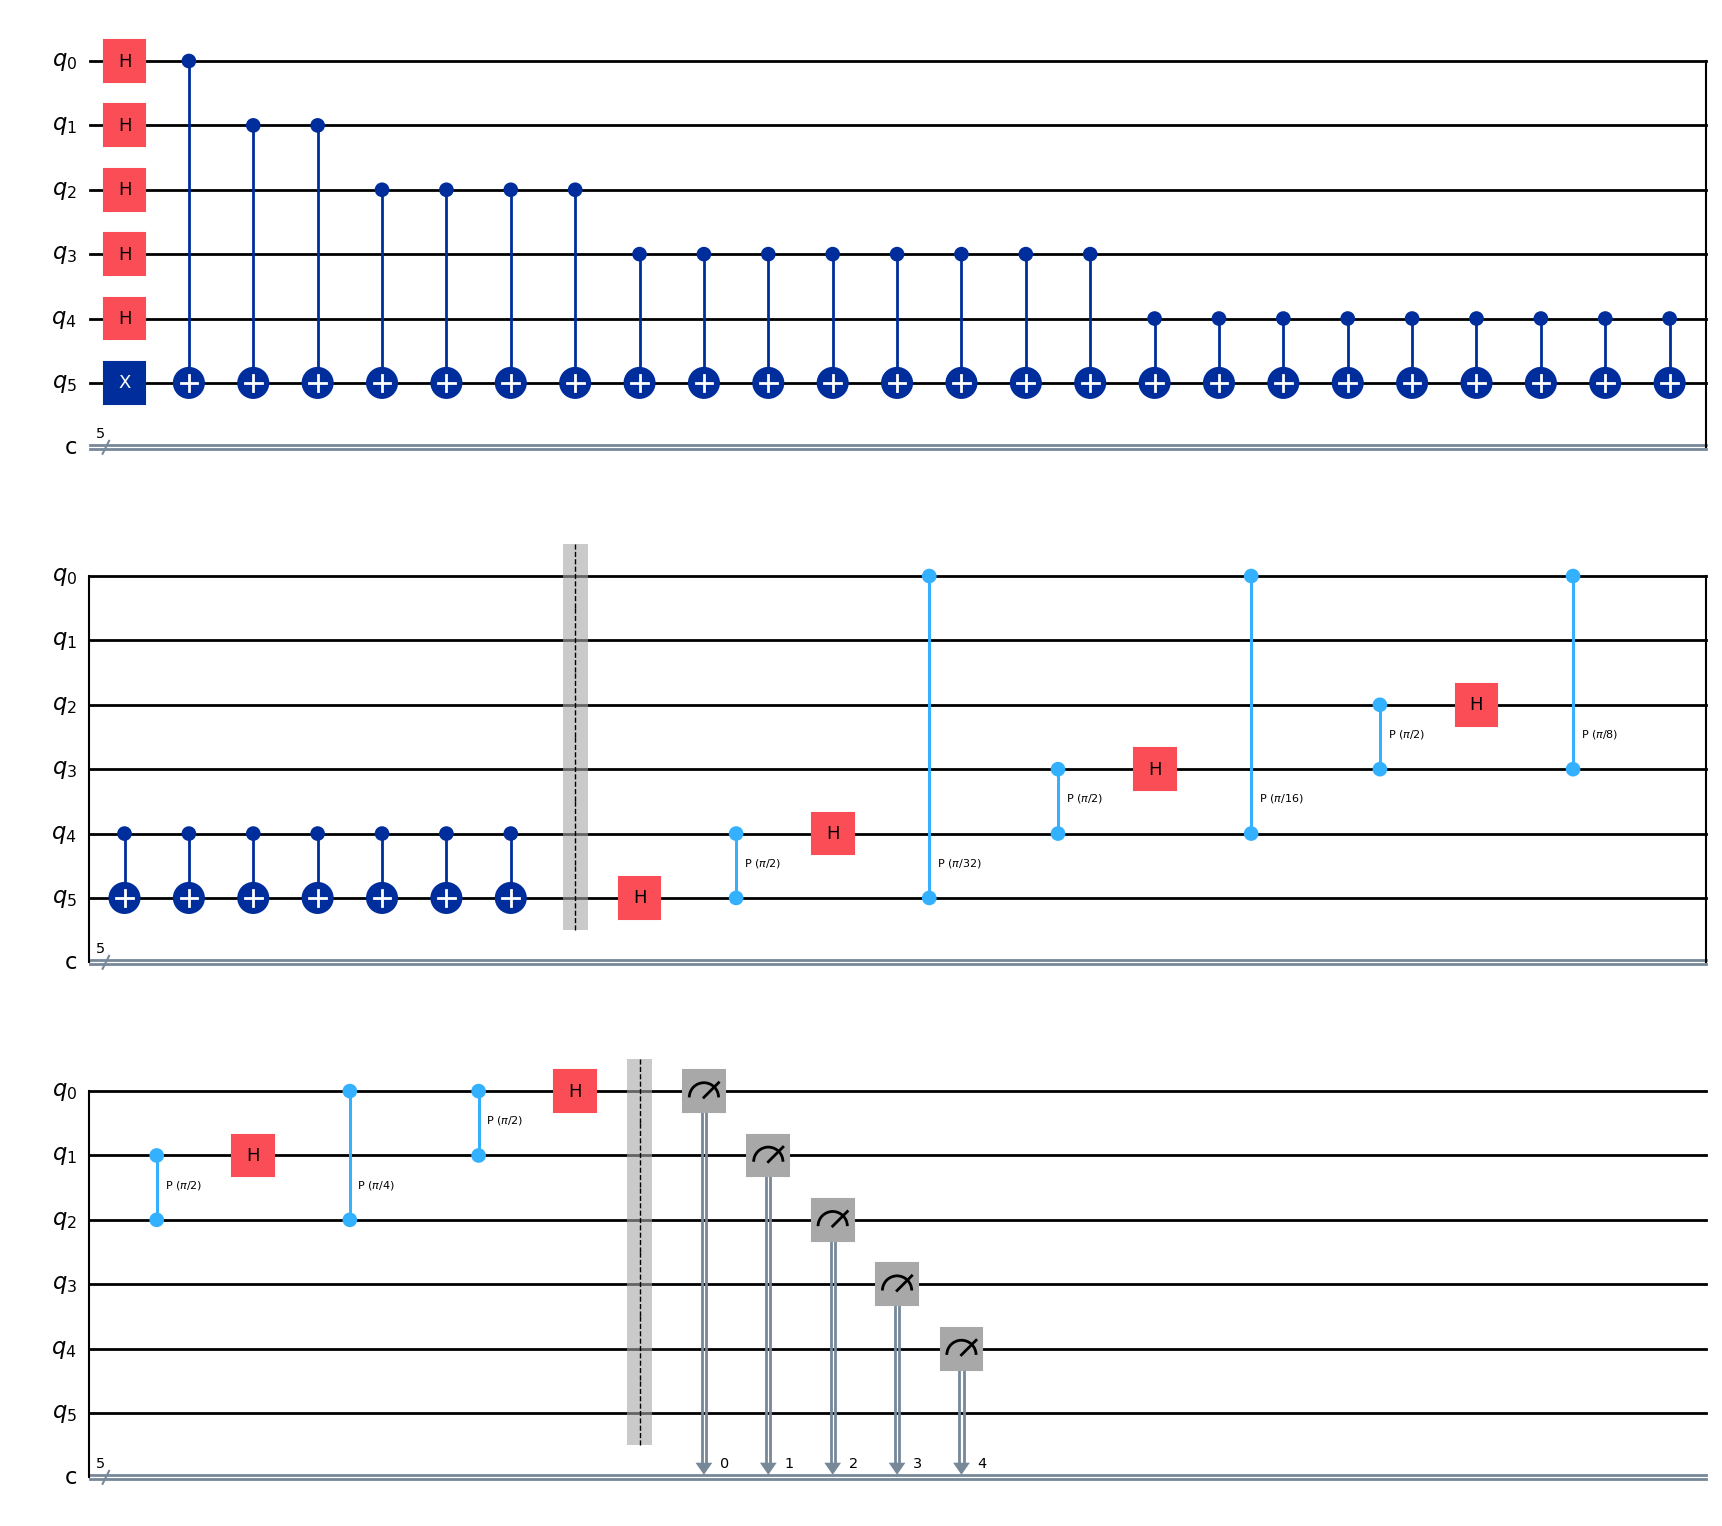

In [25]:

qpe.barrier()
qpe.h(qbitnum-1)
for i in reversed(range(qbitnum-2)): #runs for the amount of qbits - 1
    qpe.cp(math.pi/2, i+1, i+2)
    qpe.h(i+1)
for i in reversed(range(qbitnum-1)): #runs for the amount of qbits - 1
    qpe.cp(math.pi/math.pow(2, i+1), 0, i+1) #starts at qbit 1 instead of 0
qpe.h(0)
    
# Measure
qpe.barrier()

for n in range(qbitnum-1):
    qpe.measure(n,n)
qpe.draw('mpl')

     ┌───┐                                                                 »
q_0: ┤ H ├──■──────────────────────────────────────────────────────────────»
     ├───┤  │                                                              »
q_1: ┤ H ├──┼────■────■────────────────────────────────────────────────────»
     ├───┤  │    │    │                                                    »
q_2: ┤ H ├──┼────┼────┼────■────■────■────■────────────────────────────────»
     ├───┤  │    │    │    │    │    │    │                                »
q_3: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────■────■────■────■────■────■──»
     ├───┤  │    │    │    │    │    │    │    │    │    │    │    │    │  »
q_4: ┤ H ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
     ├───┤┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q_5: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»

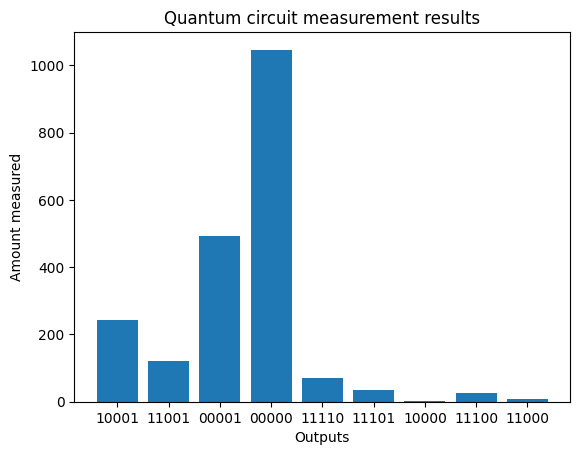

In [26]:
shots = 2048
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 
    for i in RR: 
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

res = RunSim(qpe, shots)
print(qpe)
PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()